In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import bnlearn as bn

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from pgmpy.models import BayesianNetwork

import warnings
warnings.filterwarnings("ignore")

In [10]:
train = pd.read_csv('kdsf.csv')

train['Passenger ID'] = train.index

# Atau, tambahkan kolom "Passenger ID" dengan nilai unik (misalnya, nomor urut)
train['Passenger ID'] = range(1, len(train) + 1)

cols = list(train.columns)
cols = ['Passenger ID'] + [col for col in cols if col != 'Passenger ID']
train = train[cols]

train.set_index('Passenger ID', inplace=True)

# Tampilkan trainFrame
train

,Nama Wisata,Escape,Relaxation,Play,Strenghthening family bonds,Prestige,Social Interaction,Romance,Educational Opportunity,Self-fulfilment,...,Makan Bersama,Berolahraga,Belajar,Berinteraksi dengan satwa,Mengambil Foto,Beribadah,Berkemah,Melihat Pemandangan,Berbelanja,Kodam Street Food Surabaya
Passenger ID,,,,,,,,,,,,,,,,,,,,,
1,Tunjungan Plaza,1,1,1,1,1,1,1,1,1,...,1,1,0,0,1,1,0,0,1,0
2,Tunjungan Plaza,1,1,1,1,1,1,1,0,0,...,1,0,0,0,1,1,0,0,1,0
3,Tunjungan Plaza,1,0,1,1,1,1,1,0,0,...,1,0,1,0,1,0,0,0,1,0
4,Tunjungan Plaza,1,1,1,1,0,0,1,1,1,...,1,0,0,0,1,0,0,0,1,0
5,Tunjungan Plaza,1,1,1,1,0,1,1,0,0,...,1,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346,Balai Pemuda Alun - Alun Surabaya,1,0,1,1,0,1,1,1,0,...,0,1,1,0,1,0,0,0,0,0
1347,Balai Pemuda Alun - Alun Surabaya,1,1,1,1,0,1,1,1,1,...,0,1,1,0,1,0,0,0,0,0
1348,Balai Pemuda Alun - Alun Surabaya,1,1,1,0,1,1,1,1,1,...,1,1,1,0,1,0,0,1,1,0


In [11]:
drop_list = ['Aktivitas Wisata', 'Nama Wisata']

train_wisata = train.drop(columns=drop_list)
train_wisata

,Escape,Relaxation,Play,Strenghthening family bonds,Prestige,Social Interaction,Romance,Educational Opportunity,Self-fulfilment,Wish-fulfiment,...,Makan Bersama,Berolahraga,Belajar,Berinteraksi dengan satwa,Mengambil Foto,Beribadah,Berkemah,Melihat Pemandangan,Berbelanja,Kodam Street Food Surabaya
Passenger ID,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,0,...,1,1,0,0,1,1,0,0,1,0
2,1,1,1,1,1,1,1,0,0,1,...,1,0,0,0,1,1,0,0,1,0
3,1,0,1,1,1,1,1,0,0,0,...,1,0,1,0,1,0,0,0,1,0
4,1,1,1,1,0,0,1,1,1,0,...,1,0,0,0,1,0,0,0,1,0
5,1,1,1,1,0,1,1,0,0,0,...,1,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346,1,0,1,1,0,1,1,1,0,0,...,0,1,1,0,1,0,0,0,0,0
1347,1,1,1,1,0,1,1,1,1,0,...,0,1,1,0,1,0,0,0,0,0
1348,1,1,1,0,1,1,1,1,1,1,...,1,1,1,0,1,0,0,1,1,0


In [12]:
dfhot_train, dfnum_train = bn.df2onehot(train_wisata)



[df2onehot] >Auto detecting dtypes.


100%|██████████| 24/24 [00:00<00:00, 126.93it/s]


[df2onehot] >Set dtypes in dataframe..


[df2onehot]: 100%|██████████| 24/24 [00:00<00:00, 277.23it/s]

[df2onehot] >Total onehot features: 48


In [13]:
dfnum_target = dfnum_train.pop('Kodam Street Food Surabaya')
dfnum_target

0       0
1       0
2       0
3       0
4       0
       ..
1345    0
1346    0
1347    0
1348    0
1349    0
Name: Kodam Street Food Surabaya, Length: 1350, dtype: int32

In [6]:
Xtrain, Xval, Ztrain, Zval = train_test_split(dfnum_train, dfnum_target, test_size=0.2, random_state=0)
valid = pd.concat([Xval, Zval], axis='columns')
dfnum = pd.concat([Xtrain, Ztrain], axis='columns')
dfnum

,Escape,Relaxation,Play,Strenghthening family bonds,Prestige,Social Interaction,Romance,Educational Opportunity,Self-fulfilment,Wish-fulfiment,...,Makan Bersama,Berolahraga,Belajar,Berinteraksi dengan satwa,Mengambil Foto,Beribadah,Berkemah,Melihat Pemandangan,Berbelanja,Kodam Street Food Surabaya
1118,1,1,0,1,0,1,0,1,1,1,...,0,0,1,0,1,0,0,0,1,0
642,1,1,1,1,1,1,1,1,1,1,...,0,0,1,0,1,0,0,0,0,0
687,1,1,0,1,0,1,0,1,1,1,...,0,0,0,0,0,1,0,0,0,0
322,1,0,1,1,1,0,1,0,1,1,...,1,0,0,0,1,0,0,1,1,0
326,0,0,1,1,1,1,0,0,0,1,...,1,0,0,0,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,1,1,0,1,0,1,0,1,0,1,...,0,0,1,0,0,1,0,0,0,0
835,1,1,0,1,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1216,1,1,0,1,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
559,1,1,1,1,1,1,0,1,1,1,...,1,1,1,0,1,1,0,1,1,0


[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


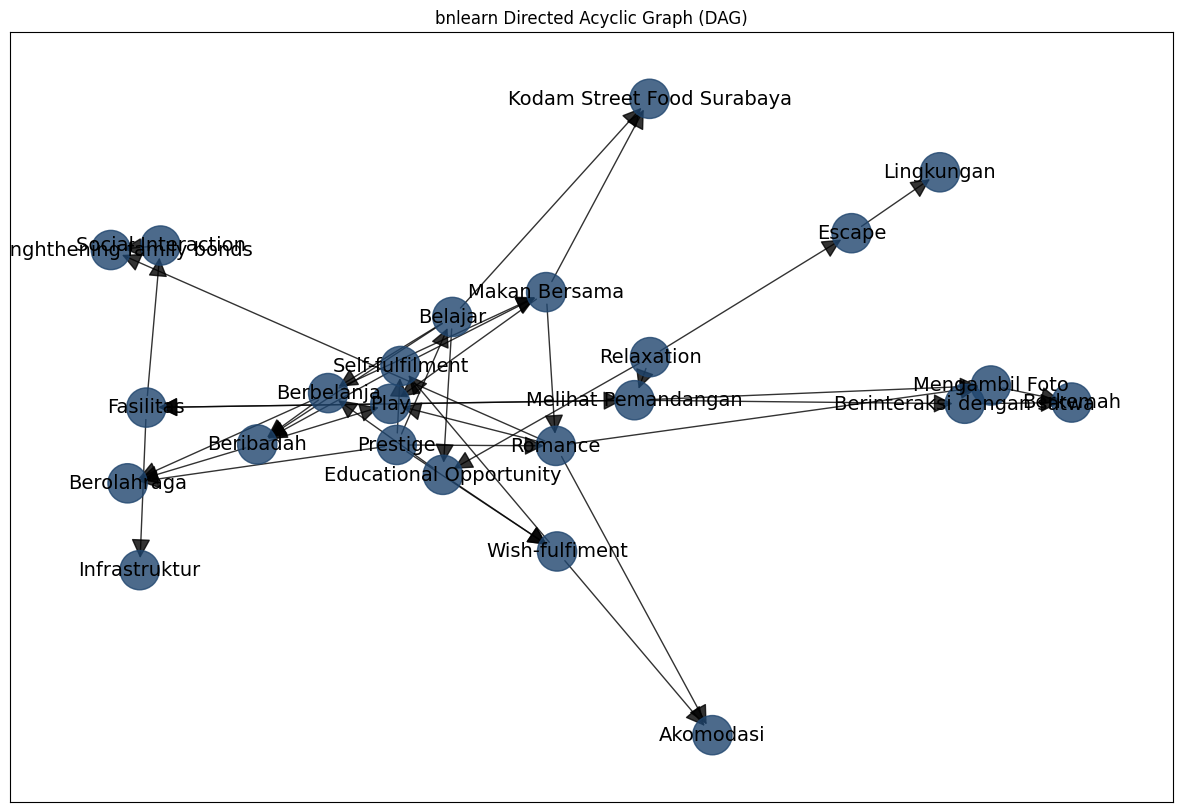

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of Escape:
+------------+--------------------+---------------------+
| Relaxation | Relaxation(0)      | Relaxation(1)       |
+------------+--------------------+---------------------+
| Escape(0)  | 0.4199706314243759 | 0.24017155110793423 |
+------------+--------------------+---------------------+
| Escape(1)  | 0.580029368575624  | 0.7598284488920658  |
+------------+--------------------+---------------------+
[bnlearn] >CPD of Lingkungan:
+---------------+-------------------+--------------------+
| Escape        | Escape(0)         | Escape(1)          |
+---------------+-------------------+--------------------+
| Lingkungan(0) | 0.432475884244373 | 0.2085048010973937 |
+---------------+-------------------+--------------------+
| Lingkungan(1) | 0.567524115755627 | 0.791495198

In [7]:

# Structure learning
DAG = bn.structure_learning.fit(dfnum, methodtype='hc', root_node='Kodam Street Food Surabaya', bw_list_method='nodes', verbose=3)

# Plot
G = bn.plot(DAG)

# Parameter learning
model = bn.parameter_learning.fit(DAG, dfnum, verbose=3)

In [8]:
def get_acc(model, df, col):
    # Get accuracy score by the model for the validation dataset df with target col
    pred = bn.predict(model, df, variables=[col])
    acc = accuracy_score(df[col], pred[col])
    print('Accuracy -', acc)
    return acc

In [9]:
get_acc(model, valid, 'Kodam Street Food Surabaya')

[bnlearn]> Remaining columns for inference: 23


  0%|          | 0/254 [00:00<?, ?it/s]

  7%|▋         | 17/254 [00:00<00:01, 162.56it/s]

+-------------------------------+-----------------------------------+
| Kodam Street Food Surabaya    |   phi(Kodam Street Food Surabaya) |
+===============================+===================================+
| Kodam Street Food Surabaya(0) |                            0.7673 |
+-------------------------------+-----------------------------------+
| Kodam Street Food Surabaya(1) |                            0.2327 |
+-------------------------------+-----------------------------------+
+-------------------------------+-----------------------------------+
| Kodam Street Food Surabaya    |   phi(Kodam Street Food Surabaya) |
+===============================+===================================+
| Kodam Street Food Surabaya(0) |                            0.7190 |
+-------------------------------+-----------------------------------+
| Kodam Street Food Surabaya(1) |                            0.2810 |
+-------------------------------+-----------------------------------+
+-------------------

 13%|█▎        | 34/254 [00:00<00:01, 154.02it/s]

+-------------------------------+-----------------------------------+
| Kodam Street Food Surabaya    |   phi(Kodam Street Food Surabaya) |
+===============================+===================================+
| Kodam Street Food Surabaya(0) |                            0.7273 |
+-------------------------------+-----------------------------------+
| Kodam Street Food Surabaya(1) |                            0.2727 |
+-------------------------------+-----------------------------------+
+-------------------------------+-----------------------------------+
| Kodam Street Food Surabaya    |   phi(Kodam Street Food Surabaya) |
+===============================+===================================+
| Kodam Street Food Surabaya(0) |                            0.7190 |
+-------------------------------+-----------------------------------+
| Kodam Street Food Surabaya(1) |                            0.2810 |
+-------------------------------+-----------------------------------+
+-------------------

 20%|█▉        | 50/254 [00:00<00:01, 146.30it/s]

+-------------------------------+-----------------------------------+
| Kodam Street Food Surabaya    |   phi(Kodam Street Food Surabaya) |
+===============================+===================================+
| Kodam Street Food Surabaya(0) |                            0.7190 |
+-------------------------------+-----------------------------------+
| Kodam Street Food Surabaya(1) |                            0.2810 |
+-------------------------------+-----------------------------------+
+-------------------------------+-----------------------------------+
| Kodam Street Food Surabaya    |   phi(Kodam Street Food Surabaya) |
+===============================+===================================+
| Kodam Street Food Surabaya(0) |                            0.7673 |
+-------------------------------+-----------------------------------+
| Kodam Street Food Surabaya(1) |                            0.2327 |
+-------------------------------+-----------------------------------+
+-------------------

 26%|██▌       | 66/254 [00:00<00:01, 150.82it/s]

+-------------------------------+-----------------------------------+
| Kodam Street Food Surabaya    |   phi(Kodam Street Food Surabaya) |
+===============================+===================================+
| Kodam Street Food Surabaya(0) |                            0.7190 |
+-------------------------------+-----------------------------------+
| Kodam Street Food Surabaya(1) |                            0.2810 |
+-------------------------------+-----------------------------------+

 32%|███▏      | 82/254 [00:00<00:01, 137.65it/s]


+-------------------------------+-----------------------------------+
| Kodam Street Food Surabaya    |   phi(Kodam Street Food Surabaya) |
+===============================+===================================+
| Kodam Street Food Surabaya(0) |                            0.7190 |
+-------------------------------+-----------------------------------+
| Kodam Street Food Surabaya(1) |                            0.2810 |
+-------------------------------+-----------------------------------+
+-------------------------------+-----------------------------------+
| Kodam Street Food Surabaya    |   phi(Kodam Street Food Surabaya) |
+===============================+===================================+
| Kodam Street Food Surabaya(0) |                            0.7455 |
+-------------------------------+-----------------------------------+
| Kodam Street Food Surabaya(1) |                            0.2545 |
+-------------------------------+-----------------------------------+
+------------------

 44%|████▎     | 111/254 [00:00<00:01, 138.40it/s]

+-------------------------------+-----------------------------------+
| Kodam Street Food Surabaya    |   phi(Kodam Street Food Surabaya) |
+===============================+===================================+
| Kodam Street Food Surabaya(0) |                            0.7455 |
+-------------------------------+-----------------------------------+
| Kodam Street Food Surabaya(1) |                            0.2545 |
+-------------------------------+-----------------------------------+
+-------------------------------+-----------------------------------+
| Kodam Street Food Surabaya    |   phi(Kodam Street Food Surabaya) |
+===============================+===================================+
| Kodam Street Food Surabaya(0) |                            0.7673 |
+-------------------------------+-----------------------------------+
| Kodam Street Food Surabaya(1) |                            0.2327 |
+-------------------------------+-----------------------------------+
+-------------------

 57%|█████▋    | 144/254 [00:00<00:00, 152.48it/s]

+-------------------------------+-----------------------------------+
| Kodam Street Food Surabaya    |   phi(Kodam Street Food Surabaya) |
+===============================+===================================+
| Kodam Street Food Surabaya(0) |                            0.7455 |
+-------------------------------+-----------------------------------+
| Kodam Street Food Surabaya(1) |                            0.2545 |
+-------------------------------+-----------------------------------+
+-------------------------------+-----------------------------------+
| Kodam Street Food Surabaya    |   phi(Kodam Street Food Surabaya) |
+===============================+===================================+
| Kodam Street Food Surabaya(0) |                            0.7190 |
+-------------------------------+-----------------------------------+
| Kodam Street Food Surabaya(1) |                            0.2810 |
+-------------------------------+-----------------------------------+
+-------------------

 78%|███████▊  | 197/254 [00:01<00:00, 164.06it/s]

+-------------------------------+-----------------------------------+
| Kodam Street Food Surabaya    |   phi(Kodam Street Food Surabaya) |
+===============================+===================================+
| Kodam Street Food Surabaya(0) |                            0.7190 |
+-------------------------------+-----------------------------------+
| Kodam Street Food Surabaya(1) |                            0.2810 |
+-------------------------------+-----------------------------------+
+-------------------------------+-----------------------------------+
| Kodam Street Food Surabaya    |   phi(Kodam Street Food Surabaya) |
+===============================+===================================+
| Kodam Street Food Surabaya(0) |                            0.7455 |
+-------------------------------+-----------------------------------+
| Kodam Street Food Surabaya(1) |                            0.2545 |
+-------------------------------+-----------------------------------+
+-------------------

 91%|█████████ | 231/254 [00:01<00:00, 161.47it/s]

+-------------------------------+-----------------------------------+
| Kodam Street Food Surabaya    |   phi(Kodam Street Food Surabaya) |
+===============================+===================================+
| Kodam Street Food Surabaya(0) |                            0.7190 |
+-------------------------------+-----------------------------------+
| Kodam Street Food Surabaya(1) |                            0.2810 |
+-------------------------------+-----------------------------------+
+-------------------------------+-----------------------------------+
| Kodam Street Food Surabaya    |   phi(Kodam Street Food Surabaya) |
+===============================+===================================+
| Kodam Street Food Surabaya(0) |                            0.7273 |
+-------------------------------+-----------------------------------+
| Kodam Street Food Surabaya(1) |                            0.2727 |
+-------------------------------+-----------------------------------+
+-------------------

100%|██████████| 254/254 [00:01<00:00, 153.37it/s]

+-------------------------------+-----------------------------------+
| Kodam Street Food Surabaya    |   phi(Kodam Street Food Surabaya) |
+===============================+===================================+
| Kodam Street Food Surabaya(0) |                            0.7455 |
+-------------------------------+-----------------------------------+
| Kodam Street Food Surabaya(1) |                            0.2545 |
+-------------------------------+-----------------------------------+
+-------------------------------+-----------------------------------+
| Kodam Street Food Surabaya    |   phi(Kodam Street Food Surabaya) |
+===============================+===================================+
| Kodam Street Food Surabaya(0) |                            0.7673 |
+-------------------------------+-----------------------------------+
| Kodam Street Food Surabaya(1) |                            0.2327 |
+-------------------------------+-----------------------------------+
+-------------------

0.9666666666666667